In [1]:
import pandas as pd

# Load one file first to see the structure
df = pd.read_csv('../data/intersection_data_set_jan_01_15.csv')
df.head()

,time,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,sg3,sg4,sg5,sg6,sg7,sg8,sg9,sg10,sg11,sg12
0,2019-01-01 05:37:15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2019-01-01 05:37:16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2019-01-01 05:37:17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2019-01-01 05:37:18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2019-01-01 05:37:19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [2]:
print(df.columns.tolist())

['time', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'sg1', 'sg2', 'sg3', 'sg4', 'sg5', 'sg6', 'sg7', 'sg8', 'sg9', 'sg10', 'sg11', 'sg12']


In [3]:
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")

Rows: 1275758
Columns: 23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275758 entries, 0 to 1275757
Data columns (total 23 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1275758 non-null  object 
 1   d1      1275758 non-null  float64
 2   d2      1275758 non-null  float64
 3   d3      1275758 non-null  float64
 4   d4      1275758 non-null  float64
 5   d5      1275758 non-null  float64
 6   d6      1275758 non-null  float64
 7   d7      1275758 non-null  float64
 8   d8      1275758 non-null  float64
 9   d9      1275758 non-null  float64
 10  d10     1275758 non-null  float64
 11  sg1     1275758 non-null  int64  
 12  sg2     1275758 non-null  float64
 13  sg3     1275758 non-null  float64
 14  sg4     1275758 non-null  float64
 15  sg5     1275758 non-null  float64
 16  sg6     1275758 non-null  float64
 17  sg7     1275758 non-null  float64
 18  sg8     1275758 non-null  float64
 19  sg9     1275758 non-null  float64
 20  sg10    1275758 non-null

In [5]:
# Load all files
jan_1 = pd.read_csv('../data/intersection_data_set_jan_01_15.csv')
jan_2 = pd.read_csv('../data/intersection_data_set_jan_16_31.csv')
feb_1 = pd.read_csv('../data/intersection_data_set_feb_01_15.csv')
feb_2 = pd.read_csv('../data/intersection_data_set_feb_16_28.csv')

# Combine into one dataframe
df = pd.concat([jan_1, jan_2, feb_1, feb_2], ignore_index=True)

print(f"Total rows: {len(df)}")

Total rows: 5076422


In [6]:
df['time'] = pd.to_datetime(df['time'])
print(f"Date range: {df['time'].min()} to {df['time'].max()}")

Date range: 2019-01-01 05:37:15 to 2019-02-28 23:59:57


In [7]:
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.day_name()
df['date'] = df['time'].dt.date

In [8]:
# Sum all detector readings by hour
# Higher value = more vehicles detected
detector_cols = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10']

hourly_traffic = df.groupby('hour')[detector_cols].sum()
hourly_total = hourly_traffic.sum(axis=1)

print(hourly_total)

hour
0      31767.0
1       6761.0
2       5792.0
3       4297.0
4       4475.0
5      22420.0
6      60232.0
7      87769.0
8     102148.0
9      94598.0
10    102659.0
11    107099.0
12    101934.0
13    110104.0
14    126827.0
15    133373.0
16    137916.0
17    121424.0
18    105338.0
19     86868.0
20     70199.0
21     60641.0
22     55863.0
23     48357.0
dtype: float64


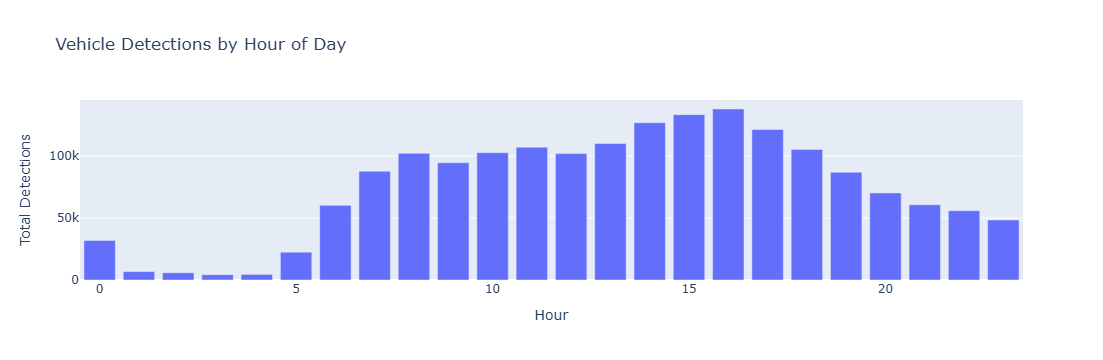

In [9]:
import plotly.express as px

fig = px.bar(
    x=hourly_total.index,
    y=hourly_total.values,
    title='Vehicle Detections by Hour of Day',
    labels={'x': 'Hour', 'y': 'Total Detections'}
)
fig.show()

In [10]:
signal_cols = ['sg1', 'sg2', 'sg3', 'sg4', 'sg5', 'sg6', 'sg7', 'sg8', 'sg9', 'sg10', 'sg11', 'sg12']

# Percentage of time each signal is green
green_percentage = (df[signal_cols].sum() / len(df) * 100).round(2)
print(green_percentage)

sg1     154.38
sg2     144.36
sg3     149.67
sg4     151.10
sg5     151.42
sg6     142.72
sg7     161.26
sg8     167.20
sg9     166.98
sg10    174.95
sg11      4.71
sg12      5.78
dtype: float64


In [11]:
# Check unique values in signal columns
for col in signal_cols:
    print(f"{col}: {df[col].unique()}")

sg1: [0. 1. 8.]
sg2: [0. 1. 8.]
sg3: [0. 1. 8.]
sg4: [0. 1. 8.]
sg5: [0. 1. 8.]
sg6: [0. 1. 8.]
sg7: [0. 1. 8.]
sg8: [1. 0. 8.]
sg9: [0. 1. 8.]
sg10: [1. 0. 8.]
sg11: [0. 1.]
sg12: [0. 1.]


In [12]:
# Count only where signal equals 1 (green)
green_percentage = {}
for col in signal_cols:
    green_count = (df[col] == 1).sum()
    green_percentage[col] = round(green_count / len(df) * 100, 2)

print(green_percentage)

{'sg1': 22.79, 'sg2': 12.78, 'sg3': 18.08, 'sg4': 19.52, 'sg5': 19.84, 'sg6': 11.13, 'sg7': 29.68, 'sg8': 35.62, 'sg9': 35.4, 'sg10': 43.37, 'sg11': 4.71, 'sg12': 5.78}


In [13]:
# Signal state distribution for sg1
print(df['sg1'].value_counts(normalize=True) * 100)

sg1
0.0    60.758463
1.0    22.793436
8.0    16.448101
Name: proportion, dtype: float64


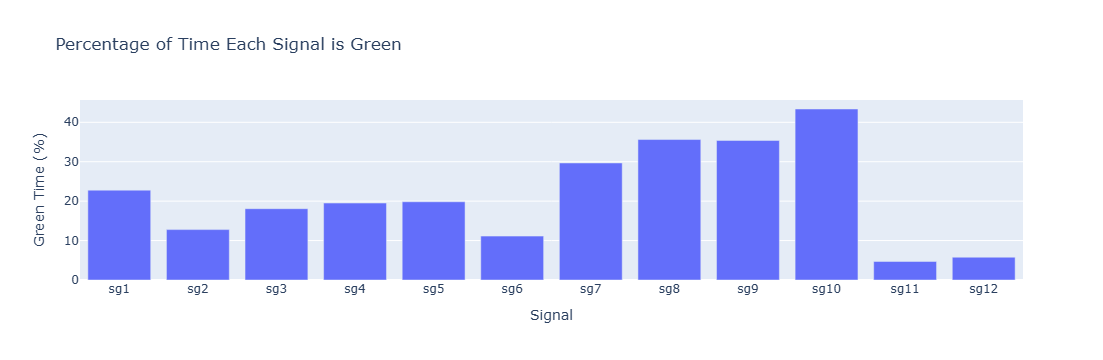

In [14]:
fig = px.bar(
    x=list(green_percentage.keys()),
    y=list(green_percentage.values()),
    title='Percentage of Time Each Signal is Green',
    labels={'x': 'Signal', 'y': 'Green Time (%)'}
)
fig.show()


In [15]:
# Peak hours (7-9 AM, 15-18 PM) vs Off-peak
df['is_peak'] = df['hour'].isin([7, 8, 9, 15, 16, 17, 18])

# Green percentage during peak vs off-peak
peak_green = {}
offpeak_green = {}

for col in signal_cols:
    peak_data = df[df['is_peak'] == True]
    offpeak_data = df[df['is_peak'] == False]
    
    peak_green[col] = round((peak_data[col] == 1).sum() / len(peak_data) * 100, 2)
    offpeak_green[col] = round((offpeak_data[col] == 1).sum() / len(offpeak_data) * 100, 2)

print("Peak hours green %:")
print(peak_green)
print("\nOff-peak green %:")
print(offpeak_green)

Peak hours green %:
{'sg1': 27.0, 'sg2': 15.15, 'sg3': 21.48, 'sg4': 23.18, 'sg5': 24.34, 'sg6': 13.27, 'sg7': 35.31, 'sg8': 42.54, 'sg9': 43.09, 'sg10': 51.57, 'sg11': 6.17, 'sg12': 7.52}

Off-peak green %:
{'sg1': 21.05, 'sg2': 11.79, 'sg3': 16.67, 'sg4': 18.0, 'sg5': 17.97, 'sg6': 10.25, 'sg7': 27.35, 'sg8': 32.75, 'sg9': 32.21, 'sg10': 39.97, 'sg11': 4.11, 'sg12': 5.06}


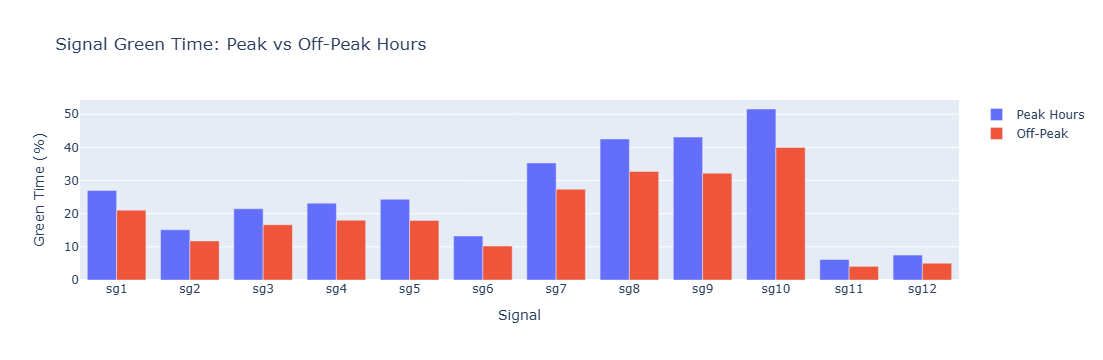

In [16]:
import plotly.graph_objects as go

signals = list(peak_green.keys())
peak_values = list(peak_green.values())
offpeak_values = list(offpeak_green.values())

fig = go.Figure(data=[
    go.Bar(name='Peak Hours', x=signals, y=peak_values),
    go.Bar(name='Off-Peak', x=signals, y=offpeak_values)
])

fig.update_layout(
    title='Signal Green Time: Peak vs Off-Peak Hours',
    xaxis_title='Signal',
    yaxis_title='Green Time (%)',
    barmode='group'
)
fig.show()


In [17]:
# Calculate average detector activity per hour
hourly_detections = df.groupby('hour')[detector_cols].mean().sum(axis=1)

# Calculate average green time per hour (for main signals sg7-sg10)
main_signals = ['sg7', 'sg8', 'sg9', 'sg10']
hourly_green = df.groupby('hour')[main_signals].apply(lambda x: (x == 1).mean()).mean(axis=1) * 100

# Combine into one dataframe
comparison = pd.DataFrame({
    'detections': hourly_detections,
    'green_pct': hourly_green
})

print(comparison)

      detections  green_pct
hour                       
0       0.152820  43.290102
1       0.032380   0.276102
2       0.027739   0.000000
3       0.020580   0.000000
4       0.021432   0.000000
5       0.106678  43.093641
6       0.283578  42.774247
7       0.413225  42.902660
8       0.480923  42.983286
9       0.445377  42.719633
10      0.483329  42.596869
11      0.504233  43.008710
12      0.479915  43.454449
13      0.518380  43.095457
14      0.597114  43.268244
15      0.627933  43.469750
16      0.649322  43.369115
17      0.571676  43.282957
18      0.495942  43.159016
19      0.408983  43.109581
20      0.330504  43.355697
21      0.285504  43.025777
22      0.263008  43.016008
23      0.227686  42.921463


In [18]:
# Look at 2-3 AM data
night_data = df[df['hour'].isin([2, 3])]
print("Signal values at 2-3 AM:")
print(night_data[signal_cols].describe())

Signal values at 2-3 AM:
            sg1       sg2       sg3       sg4       sg5       sg6       sg7  \
count  417600.0  417600.0  417600.0  417600.0  417600.0  417600.0  417600.0   
mean        8.0       8.0       8.0       8.0       8.0       8.0       8.0   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         8.0       8.0       8.0       8.0       8.0       8.0       8.0   
25%         8.0       8.0       8.0       8.0       8.0       8.0       8.0   
50%         8.0       8.0       8.0       8.0       8.0       8.0       8.0   
75%         8.0       8.0       8.0       8.0       8.0       8.0       8.0   
max         8.0       8.0       8.0       8.0       8.0       8.0       8.0   

            sg8       sg9      sg10      sg11      sg12  
count  417600.0  417600.0  417600.0  417600.0  417600.0  
mean        8.0       8.0       8.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0  
min         8.0       8.0      

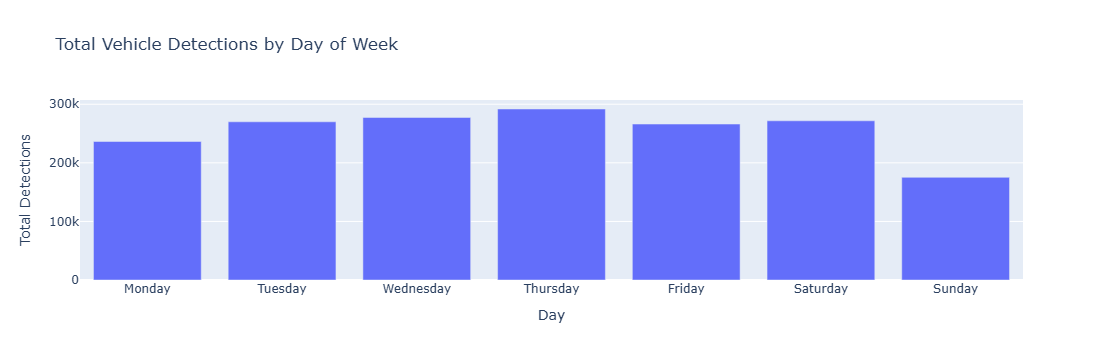

In [19]:
# Traffic by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_traffic = df.groupby('day_of_week')[detector_cols].sum().sum(axis=1)
daily_traffic = daily_traffic.reindex(day_order)

fig = px.bar(
    x=daily_traffic.index,
    y=daily_traffic.values,
    title='Total Vehicle Detections by Day of Week',
    labels={'x': 'Day', 'y': 'Total Detections'}
)
fig.show()

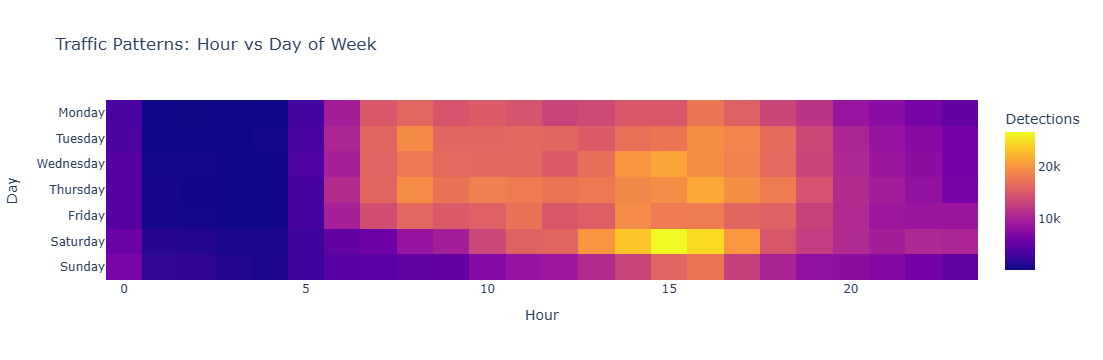

In [21]:
# Create pivot table
heatmap_data = df.groupby(['day_of_week', 'hour'])[detector_cols].sum().sum(axis=1).reset_index()
heatmap_data.columns = ['day_of_week', 'hour', 'detections']

heatmap_pivot = heatmap_data.pivot(index='day_of_week', columns='hour', values='detections')
heatmap_pivot = heatmap_pivot.reindex(day_order)

fig = px.imshow(
    heatmap_pivot,
    title='Traffic Patterns: Hour vs Day of Week',
    labels={'x': 'Hour', 'y': 'Day', 'color': 'Detections'},
    aspect='auto'
)
fig.show()

In [22]:
# Total detections per detector
detector_totals = df[detector_cols].sum().sort_values(ascending=False)
print(detector_totals)

d7     471398.0
d1     282228.0
d5     279394.0
d4     223697.0
d6     148095.0
d9     139999.0
d8      81396.0
d3      65564.0
d10     58081.0
d2      39009.0
dtype: float64


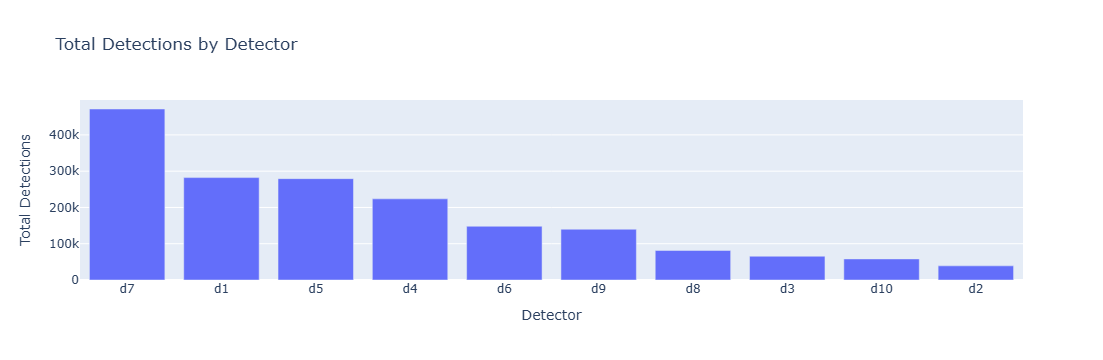

In [23]:
fig = px.bar(
    x=detector_totals.index,
    y=detector_totals.values,
    title='Total Detections by Detector',
    labels={'x': 'Detector', 'y': 'Total Detections'}
)
fig.show()

In [24]:
# Find moments when tram signals turn green
df['tram_active'] = (df['sg11'] == 1) | (df['sg12'] == 1)

# How often are trams active?
tram_frequency = df['tram_active'].sum()
tram_percentage = (tram_frequency / len(df)) * 100

print(f"Tram signals active: {tram_frequency:,} seconds")
print(f"Percentage of time: {tram_percentage:.2f}%")

Tram signals active: 493,004 seconds
Percentage of time: 9.71%


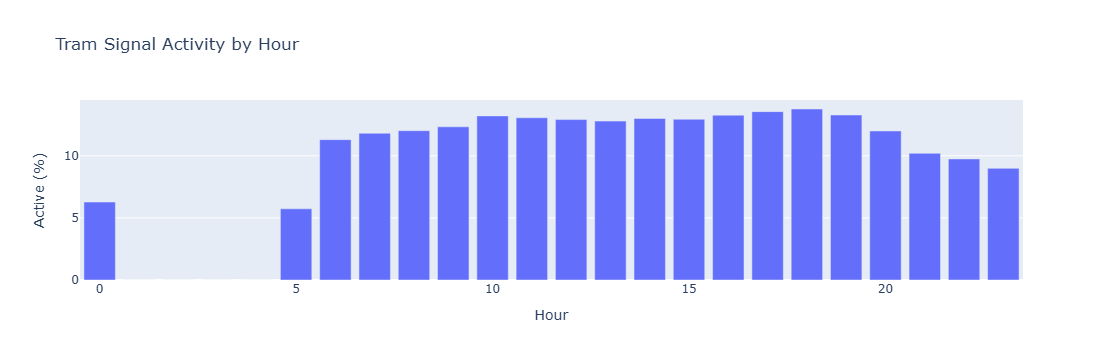

In [25]:
# Tram activity by hour
tram_by_hour = df.groupby('hour')['tram_active'].mean() * 100

fig = px.bar(
    x=tram_by_hour.index,
    y=tram_by_hour.values,
    title='Tram Signal Activity by Hour',
    labels={'x': 'Hour', 'y': 'Active (%)'}
)
fig.show()

In [26]:
# For each detector, check if it detects a vehicle while its corresponding signal is red
# This is a simplified analysis - we'll look at d7 (busiest) with sg7

# When d7 detects a vehicle (=1) and sg7 is red (=0), that's waiting
waiting = ((df['d7'] == 1) & (df['sg7'] == 0)).sum()
total_detections = (df['d7'] == 1).sum()

wait_percentage = (waiting / total_detections) * 100
print(f"Detector d7 detections while signal red: {wait_percentage:.1f}%")

Detector d7 detections while signal red: 58.8%


In [27]:
# Simplified assumption: d1-d6 might correspond to sg1-sg6, d7-d10 to sg7-sg10
pairs = [
    ('d1', 'sg1'), ('d2', 'sg2'), ('d3', 'sg3'),
    ('d4', 'sg4'), ('d5', 'sg5'), ('d6', 'sg6'),
    ('d7', 'sg7'), ('d8', 'sg8'), ('d9', 'sg9'), ('d10', 'sg10')
]

print("Wait percentage (vehicle detected while signal red):\n")
for detector, signal in pairs:
    waiting = ((df[detector] == 1) & (df[signal] == 0)).sum()
    total = (df[detector] == 1).sum()
    if total > 0:
        pct = (waiting / total) * 100
        print(f"{detector} + {signal}: {pct:.1f}%")

Wait percentage (vehicle detected while signal red):

d1 + sg1: 73.6%
d2 + sg2: 97.9%
d3 + sg3: 95.6%
d4 + sg4: 74.6%
d5 + sg5: 70.0%
d6 + sg6: 66.3%
d7 + sg7: 58.8%
d8 + sg8: 65.4%
d9 + sg9: 65.7%
d10 + sg10: 39.3%


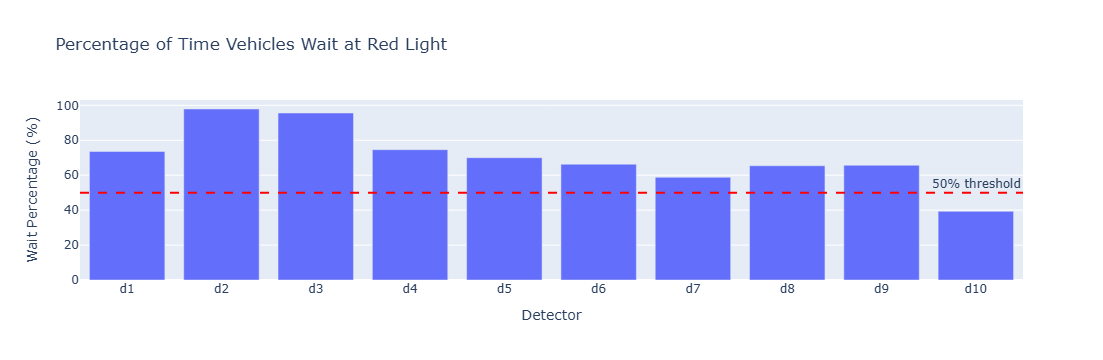

In [28]:
wait_data = {
    'd1': 73.6, 'd2': 97.9, 'd3': 95.6, 'd4': 74.6, 'd5': 70.0,
    'd6': 66.3, 'd7': 58.8, 'd8': 65.4, 'd9': 65.7, 'd10': 39.3
}

fig = px.bar(
    x=list(wait_data.keys()),
    y=list(wait_data.values()),
    title='Percentage of Time Vehicles Wait at Red Light',
    labels={'x': 'Detector', 'y': 'Wait Percentage (%)'}
)
fig.add_hline(y=50, line_dash="dash", line_color="red", annotation_text="50% threshold")
fig.show()

In [29]:
print("=" * 50)
print("ZURICH INTERSECTION ANALYSIS - KEY FINDINGS")
print("=" * 50)

print("\n📊 DATA OVERVIEW")
print(f"  Total records: {len(df):,}")
print(f"  Date range: Jan 1 - Feb 28, 2019")
print(f"  Resolution: 1 second")

print("\n🚗 TRAFFIC PATTERNS")
print(f"  Peak hour: 4 PM (16:00)")
print(f"  Busiest day: Saturday")
print(f"  Busiest time: Saturday 3 PM")
print(f"  Quietest time: 3-4 AM")

print("\n🚦 SIGNAL BEHAVIOR")
print(f"  Night mode (2-4 AM): Flashing yellow")
print(f"  Most green time: sg10 (43%)")
print(f"  Least green time: sg11/sg12 - tram (5%)")

print("\n🚋 TRAM PRIORITY")
print(f"  Tram signals active: 9.7% of time")

print("\n⏱️ EFFICIENCY (Wait at Red)")
print(f"  Most efficient: d10 (39% wait)")
print(f"  Least efficient: d2 (98% wait)")
print("=" * 50)

ZURICH INTERSECTION ANALYSIS - KEY FINDINGS

📊 DATA OVERVIEW
  Total records: 5,076,422
  Date range: Jan 1 - Feb 28, 2019
  Resolution: 1 second

🚗 TRAFFIC PATTERNS
  Peak hour: 4 PM (16:00)
  Busiest day: Saturday
  Busiest time: Saturday 3 PM
  Quietest time: 3-4 AM

🚦 SIGNAL BEHAVIOR
  Night mode (2-4 AM): Flashing yellow
  Most green time: sg10 (43%)
  Least green time: sg11/sg12 - tram (5%)

🚋 TRAM PRIORITY
  Tram signals active: 9.7% of time

⏱️ EFFICIENCY (Wait at Red)
  Most efficient: d10 (39% wait)
  Least efficient: d2 (98% wait)


In [30]:
import os
output_folder = '../output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [31]:
# 1. Hourly traffic
fig = px.bar(
    x=hourly_total.index,
    y=hourly_total.values,
    title='Vehicle Detections by Hour of Day',
    labels={'x': 'Hour', 'y': 'Total Detections'}
)
fig.write_image(f'{output_folder}/hourly_traffic.png')

In [32]:
# 2. Daily traffic
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic = df.groupby('day_of_week')[detector_cols].sum().sum(axis=1)
daily_traffic = daily_traffic.reindex(day_order)

fig = px.bar(
    x=daily_traffic.index,
    y=daily_traffic.values,
    title='Total Vehicle Detections by Day of Week',
    labels={'x': 'Day', 'y': 'Total Detections'}
)
fig.write_image(f'{output_folder}/daily_traffic.png')

In [33]:
# 3. Heatmap
heatmap_data = df.groupby(['day_of_week', 'hour'])[detector_cols].sum().sum(axis=1).reset_index()
heatmap_data.columns = ['day_of_week', 'hour', 'detections']
heatmap_pivot = heatmap_data.pivot(index='day_of_week', columns='hour', values='detections')
heatmap_pivot = heatmap_pivot.reindex(day_order)

fig = px.imshow(
    heatmap_pivot,
    title='Traffic Patterns: Hour vs Day of Week',
    labels={'x': 'Hour', 'y': 'Day', 'color': 'Detections'},
    aspect='auto'
)
fig.write_image(f'{output_folder}/traffic_heatmap.png')

In [34]:
# 4. Peak vs Off-peak
import plotly.graph_objects as go

signals = list(peak_green.keys())
peak_values = list(peak_green.values())
offpeak_values = list(offpeak_green.values())

fig = go.Figure(data=[
    go.Bar(name='Peak Hours', x=signals, y=peak_values),
    go.Bar(name='Off-Peak', x=signals, y=offpeak_values)
])
fig.update_layout(
    title='Signal Green Time: Peak vs Off-Peak Hours',
    xaxis_title='Signal',
    yaxis_title='Green Time (%)',
    barmode='group'
)
fig.write_image(f'{output_folder}/peak_vs_offpeak.png')

In [35]:
# 5. Wait percentage
wait_data = {
    'd1': 73.6, 'd2': 97.9, 'd3': 95.6, 'd4': 74.6, 'd5': 70.0,
    'd6': 66.3, 'd7': 58.8, 'd8': 65.4, 'd9': 65.7, 'd10': 39.3
}

fig = px.bar(
    x=list(wait_data.keys()),
    y=list(wait_data.values()),
    title='Percentage of Time Vehicles Wait at Red Light',
    labels={'x': 'Detector', 'y': 'Wait Percentage (%)'}
)
fig.add_hline(y=50, line_dash="dash", line_color="red", annotation_text="50% threshold")
fig.write_image(f'{output_folder}/wait_percentage.png')

In [36]:
# 6. Detector totals
fig = px.bar(
    x=detector_totals.index,
    y=detector_totals.values,
    title='Total Detections by Detector',
    labels={'x': 'Detector', 'y': 'Total Detections'}
)
fig.write_image(f'{output_folder}/detector_totals.png')